In [0]:
from google.colab import files
files.upload()

In [1]:
!unzip Tomslee-AirBnB-NYC.zip

Archive:  Tomslee-AirBnB-NYC.zip
  inflating: tomslee_airbnb_nyc_test.csv  
  inflating: tomslee_airbnb_nyc_train.csv  


In [0]:
from fastai.imports import *
from fastai import *
import fastai
from fastai_structured import *
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics

In [0]:
import pandas as pd
df_trn = pd.read_csv("tomslee_airbnb_nyc_train.csv")

In [260]:
df_trn.shape

(882000, 14)

In [261]:
df_trn.head()

,room_id,host_id,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified,overall_satisfaction
0,105,500.0,Private room,Manhattan,Hell's Kitchen,39.0,7.0,1.0,167.0,1.0,40.762099,-73.996022,5/12/17 8:56 AM,5.0
1,2515,2758.0,Private room,Manhattan,Harlem,95.0,2.0,1.0,55.0,2.0,40.799205,-73.953676,5/12/17 6:11 PM,4.5
2,2993,3352.0,Entire home/apt,Manhattan,Lower East Side,0.0,2.0,1.0,168.0,5.0,40.723593,-73.991188,5/12/17 3:16 PM,NaN
3,3046,2758.0,Entire home/apt,Manhattan,Harlem,10.0,6.0,1.0,298.0,3.0,40.813498,-73.945873,5/12/17 7:47 PM,4.5
4,3101,2758.0,Private room,Manhattan,Harlem,11.0,2.0,1.0,140.0,2.0,40.813628,-73.946299,5/12/17 12:57 AM,4.5


In [0]:
df_trn.drop(columns=['room_id','host_id'], inplace = True)

In [263]:
df_trn['room_type'].isnull().sum()

318

In [0]:
df_trn['room_type'].fillna("Null", inplace = True)

In [265]:
# df_trn.drop((df_trn.loc[df_trn['room_type'] == "Null"]), inplace = True)
df_trn.isnull().sum()

room_type                    0
borough                      0
neighborhood                 0
reviews                   5721
accommodates             37492
bedrooms                 53195
price                        0
minstay                 167337
latitude                     0
longitude                    0
last_modified                0
overall_satisfaction    250359
dtype: int64

In [0]:
df_trn = df_trn[df_trn.room_type != "Null"]

In [267]:
df_trn.isnull().sum()

room_type                    0
borough                      0
neighborhood                 0
reviews                   5721
accommodates             37174
bedrooms                 52877
price                        0
minstay                 167057
latitude                     0
longitude                    0
last_modified                0
overall_satisfaction    250353
dtype: int64

In [268]:
df_trn.drop(columns = ['last_modified'], inplace = True)
df_trn.head()

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,minstay,latitude,longitude,overall_satisfaction
0,Private room,Manhattan,Hell's Kitchen,39.0,7.0,1.0,167.0,1.0,40.762099,-73.996022,5.0
1,Private room,Manhattan,Harlem,95.0,2.0,1.0,55.0,2.0,40.799205,-73.953676,4.5
2,Entire home/apt,Manhattan,Lower East Side,0.0,2.0,1.0,168.0,5.0,40.723593,-73.991188,NaN
3,Entire home/apt,Manhattan,Harlem,10.0,6.0,1.0,298.0,3.0,40.813498,-73.945873,4.5
4,Private room,Manhattan,Harlem,11.0,2.0,1.0,140.0,2.0,40.813628,-73.946299,4.5


In [269]:
df_trn.shape

(881682, 11)

In [270]:
df_trn.isnull().sum()

room_type                    0
borough                      0
neighborhood                 0
reviews                   5721
accommodates             37174
bedrooms                 52877
price                        0
minstay                 167057
latitude                     0
longitude                    0
overall_satisfaction    250353
dtype: int64

In [271]:
df_trn.head()

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,minstay,latitude,longitude,overall_satisfaction
0,Private room,Manhattan,Hell's Kitchen,39.0,7.0,1.0,167.0,1.0,40.762099,-73.996022,5.0
1,Private room,Manhattan,Harlem,95.0,2.0,1.0,55.0,2.0,40.799205,-73.953676,4.5
2,Entire home/apt,Manhattan,Lower East Side,0.0,2.0,1.0,168.0,5.0,40.723593,-73.991188,NaN
3,Entire home/apt,Manhattan,Harlem,10.0,6.0,1.0,298.0,3.0,40.813498,-73.945873,4.5
4,Private room,Manhattan,Harlem,11.0,2.0,1.0,140.0,2.0,40.813628,-73.946299,4.5


In [0]:
def check_null(x): 
  print("Shape of df_trn is {}".format(x.shape))
  print("df_trn null values:")
  return x.isnull().sum()

In [0]:
df_trn = df_trn[df_trn.reviews.isnull() != True]

In [274]:
check_null(df_trn)

Shape of df_trn is (875961, 11)
df_trn null values:


room_type                    0
borough                      0
neighborhood                 0
reviews                      0
accommodates             31453
bedrooms                 47156
price                        0
minstay                 166931
latitude                     0
longitude                    0
overall_satisfaction    247240
dtype: int64

In [275]:
li = df_trn.accommodates.value_counts()
type(li)

pandas.core.series.Series

In [0]:
li = li.reset_index().sort_values(by = 'index')

In [277]:
li

,index,accommodates
2,1.0,114492
0,2.0,411367
3,3.0,98478
1,4.0,139074
4,5.0,33762
5,6.0,26534
7,7.0,4920
6,8.0,7792
9,9.0,1472
8,10.0,3040


In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

In [0]:
x_pos = [i for i, _ in enumerate(li.index)]
acom = li.accommodates

<BarContainer object of 16 artists>

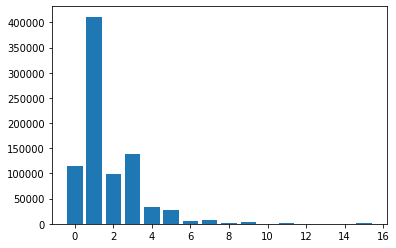

In [280]:
plt.bar(x_pos, acom)

In [0]:
fill_accomo = math.ceil(df_trn.accommodates.mean())
df_trn.accommodates.fillna(fill_accomo, inplace = True)

In [282]:
df_trn.bedrooms.fillna(1, inplace = True)
df_trn

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,minstay,latitude,longitude,overall_satisfaction
0,Private room,Manhattan,Hell's Kitchen,39.0,7.0,1.0,167.0,1.0,40.762099,-73.996022,5.0
1,Private room,Manhattan,Harlem,95.0,2.0,1.0,55.0,2.0,40.799205,-73.953676,4.5
2,Entire home/apt,Manhattan,Lower East Side,0.0,2.0,1.0,168.0,5.0,40.723593,-73.991188,NaN
3,Entire home/apt,Manhattan,Harlem,10.0,6.0,1.0,298.0,3.0,40.813498,-73.945873,4.5
4,Private room,Manhattan,Harlem,11.0,2.0,1.0,140.0,2.0,40.813628,-73.946299,4.5
...,...,...,...,...,...,...,...,...,...,...,...
881995,Private room,Manhattan,Upper East Side,0.0,1.0,1.0,37.0,NaN,40.776146,-73.952971,0.0
881996,Private room,Queens,Sunnyside,4.0,1.0,1.0,31.0,NaN,40.738456,-73.922734,4.5
881997,Private room,Brooklyn,Greenpoint,6.0,2.0,1.0,35.0,NaN,40.737145,-73.953331,4.5
881998,Private room,Queens,Woodside,1.0,2.0,1.0,34.0,NaN,40.742715,-73.904598,0.0


In [283]:
check_null(df_trn)

Shape of df_trn is (875961, 11)
df_trn null values:


room_type                    0
borough                      0
neighborhood                 0
reviews                      0
accommodates                 0
bedrooms                     0
price                        0
minstay                 166931
latitude                     0
longitude                    0
overall_satisfaction    247240
dtype: int64

In [284]:
mins = df_trn.minstay.mean()
mins = math.ceil(mins)
df_trn.minstay.fillna(mins, inplace = True)
df_trn.head()

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,minstay,latitude,longitude,overall_satisfaction
0,Private room,Manhattan,Hell's Kitchen,39.0,7.0,1.0,167.0,1.0,40.762099,-73.996022,5.0
1,Private room,Manhattan,Harlem,95.0,2.0,1.0,55.0,2.0,40.799205,-73.953676,4.5
2,Entire home/apt,Manhattan,Lower East Side,0.0,2.0,1.0,168.0,5.0,40.723593,-73.991188,NaN
3,Entire home/apt,Manhattan,Harlem,10.0,6.0,1.0,298.0,3.0,40.813498,-73.945873,4.5
4,Private room,Manhattan,Harlem,11.0,2.0,1.0,140.0,2.0,40.813628,-73.946299,4.5


In [285]:
check_null(df_trn)

Shape of df_trn is (875961, 11)
df_trn null values:


room_type                    0
borough                      0
neighborhood                 0
reviews                      0
accommodates                 0
bedrooms                     0
price                        0
minstay                      0
latitude                     0
longitude                    0
overall_satisfaction    247240
dtype: int64

In [0]:
lo = (df_trn.overall_satisfaction.mean())
lo = math.floor(l)
df_trn.overall_satisfaction.fillna(lo, inplace = True)

In [287]:
df_trn.isnull().sum()

room_type               0
borough                 0
neighborhood            0
reviews                 0
accommodates            0
bedrooms                0
price                   0
minstay                 0
latitude                0
longitude               0
overall_satisfaction    0
dtype: int64

In [288]:
df_trn.dtypes

room_type                object
borough                  object
neighborhood             object
reviews                 float64
accommodates            float64
bedrooms                float64
price                   float64
minstay                 float64
latitude                float64
longitude               float64
overall_satisfaction    float64
dtype: object

In [289]:
df_trn.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [290]:
df_trn.borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Staten Island', 'Bronx'],
      dtype=object)

In [291]:
df_trn.neighborhood.value_counts()

Williamsburg          77462
Bedford-Stuyvesant    54287
Harlem                50115
East Village          43697
Upper West Side       42137
                      ...  
Pelham Bay Park           3
Prince's Bay              2
Rossville                 1
Charleston                1
Breezy Point              1
Name: neighborhood, Length: 244, dtype: int64

In [0]:
train_cats(df_trn)

In [293]:
df_trn.dtypes

room_type               category
borough                 category
neighborhood            category
reviews                  float64
accommodates             float64
bedrooms                 float64
price                    float64
minstay                  float64
latitude                 float64
longitude                float64
overall_satisfaction     float64
dtype: object

In [294]:
df_trn.head()

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,minstay,latitude,longitude,overall_satisfaction
0,Private room,Manhattan,Hell's Kitchen,39.0,7.0,1.0,167.0,1.0,40.762099,-73.996022,5.0
1,Private room,Manhattan,Harlem,95.0,2.0,1.0,55.0,2.0,40.799205,-73.953676,4.5
2,Entire home/apt,Manhattan,Lower East Side,0.0,2.0,1.0,168.0,5.0,40.723593,-73.991188,4.0
3,Entire home/apt,Manhattan,Harlem,10.0,6.0,1.0,298.0,3.0,40.813498,-73.945873,4.5
4,Private room,Manhattan,Harlem,11.0,2.0,1.0,140.0,2.0,40.813628,-73.946299,4.5


In [0]:
df_train, y_train, nas = proc_df(df_trn, 'overall_satisfaction')

In [296]:
m = RandomForestRegressor(n_estimators = 100, n_jobs = -1)
%time m.fit(df_train, y_train)

CPU times: user 10min 24s, sys: 1.65 s, total: 10min 26s
Wall time: 5min 19s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [297]:
m.score(df_train, y_train)

0.9681599853505098

In [299]:
m = RandomForestRegressor(n_estimators = 40, n_jobs = -1)
%time m.fit(df_train, y_train)

CPU times: user 4min 5s, sys: 621 ms, total: 4min 5s
Wall time: 2min 4s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [300]:
m.score(df_train, y_train)

0.9673020257212109

In [301]:
%%time
m = RandomForestRegressor(n_estimators = 40, n_jobs = -1, oob_score = True)
m.fit(df_train, y_train)

CPU times: user 4min 10s, sys: 885 ms, total: 4min 10s
Wall time: 2min 9s


In [302]:
m.score(df_train, y_train)

0.9673302003524268

In [0]:
df_trn.drop(['minstay'], axis = 1, inplace = True)

In [305]:
df_train.head()

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,minstay,latitude,longitude
0,2,3,109,39.0,7.0,1.0,167.0,1.0,40.762099,-73.996022
1,2,3,108,95.0,2.0,1.0,55.0,2.0,40.799205,-73.953676
2,1,3,137,0.0,2.0,1.0,168.0,5.0,40.723593,-73.991188
3,1,3,108,10.0,6.0,1.0,298.0,3.0,40.813498,-73.945873
4,2,3,108,11.0,2.0,1.0,140.0,2.0,40.813628,-73.946299


In [0]:
df_train.drop('minstay', axis = 1, inplace= True)

In [308]:
df_test_fin

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,latitude,longitude
0,2,4,48,0,1,1.0,40.0,40.761626,-73.929925
1,2,3,82,5,1,1.0,39.0,40.766577,-73.952243
2,2,4,78,0,2,1.0,40.0,40.742637,-73.917706
3,2,4,78,6,1,1.0,40.0,40.744940,-73.915910
4,2,4,18,9,4,1.0,40.0,40.744587,-73.855052
...,...,...,...,...,...,...,...,...,...
798,2,5,66,18,2,1.0,27.0,40.635525,-74.120067
799,2,2,37,1,1,1.0,34.0,40.727678,-73.946057
800,2,2,6,0,2,1.0,38.0,40.680676,-73.914131
801,2,3,82,0,2,1.0,25.0,40.776178,-73.947704


In [309]:
df_train

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,latitude,longitude
0,2,3,109,39.0,7.0,1.0,167.0,40.762099,-73.996022
1,2,3,108,95.0,2.0,1.0,55.0,40.799205,-73.953676
2,1,3,137,0.0,2.0,1.0,168.0,40.723593,-73.991188
3,1,3,108,10.0,6.0,1.0,298.0,40.813498,-73.945873
4,2,3,108,11.0,2.0,1.0,140.0,40.813628,-73.946299
...,...,...,...,...,...,...,...,...,...
881995,2,3,225,0.0,1.0,1.0,37.0,40.776146,-73.952971
881996,2,4,213,4.0,1.0,1.0,31.0,40.738456,-73.922734
881997,2,2,105,6.0,2.0,1.0,35.0,40.737145,-73.953331
881998,2,4,244,1.0,2.0,1.0,34.0,40.742715,-73.904598


In [0]:
dfm.predict(df_test_fin)

In [0]:
train_cats(df_test)

In [196]:
df_trn.head()

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,latitude,longitude,overall_satisfaction
0,Private room,Manhattan,Hell's Kitchen,39.0,7.0,1.0,167.0,40.762099,-73.996022,5.0
1,Private room,Manhattan,Harlem,95.0,2.0,1.0,55.0,40.799205,-73.953676,4.5
2,Entire home/apt,Manhattan,Lower East Side,0.0,2.0,1.0,168.0,40.723593,-73.991188,4.0
3,Entire home/apt,Manhattan,Harlem,10.0,6.0,1.0,298.0,40.813498,-73.945873,4.5
4,Private room,Manhattan,Harlem,11.0,2.0,1.0,140.0,40.813628,-73.946299,4.5


In [197]:
df_test.head()

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,latitude,longitude
0,Private room,Queens,Long Island City,0,1,1.0,40.0,40.761626,-73.929925
1,Private room,Manhattan,Upper East Side,5,1,1.0,39.0,40.766577,-73.952243
2,Private room,Queens,Sunnyside,0,2,1.0,40.0,40.742637,-73.917706
3,Private room,Queens,Sunnyside,6,1,1.0,40.0,40.744940,-73.915910
4,Private room,Queens,Corona,9,4,1.0,40.0,40.744587,-73.855052


In [198]:
[df_train.shape, df_test.shape]

[(875961, 10), (803, 9)]

In [317]:
m = RandomForestRegressor(n_estimators=40, n_jobs = -1, oob_score = True)
%time m.fit(df_train, y_train)

CPU times: user 4min 35s, sys: 758 ms, total: 4min 36s
Wall time: 2min 23s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [318]:
m.score(df_train, y_train)

0.7282050422560888

In [319]:
df_test = pd.read_csv("tomslee_airbnb_nyc_test.csv")
df_test.dtypes

room_id           int64
host_id           int64
room_type        object
borough          object
neighborhood     object
reviews           int64
accommodates      int64
bedrooms        float64
price           float64
minstay         float64
latitude        float64
longitude       float64
dtype: object

In [0]:
df_test.drop(['minstay', 'room_id', 'host_id'], axis = 1, inplace = True)

In [321]:
df_test.dtypes

room_type        object
borough          object
neighborhood     object
reviews           int64
accommodates      int64
bedrooms        float64
price           float64
latitude        float64
longitude       float64
dtype: object

In [322]:
df_train.head()

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,latitude,longitude
0,2,3,109,39.0,7.0,1.0,167.0,40.762099,-73.996022
1,2,3,108,95.0,2.0,1.0,55.0,40.799205,-73.953676
2,1,3,137,0.0,2.0,1.0,168.0,40.723593,-73.991188
3,1,3,108,10.0,6.0,1.0,298.0,40.813498,-73.945873
4,2,3,108,11.0,2.0,1.0,140.0,40.813628,-73.946299


In [324]:
df_test['del'] = 1
df_test.head()

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,latitude,longitude,del
0,Private room,Queens,Long Island City,0,1,1.0,40.0,40.761626,-73.929925,1
1,Private room,Manhattan,Upper East Side,5,1,1.0,39.0,40.766577,-73.952243,1
2,Private room,Queens,Sunnyside,0,2,1.0,40.0,40.742637,-73.917706,1
3,Private room,Queens,Sunnyside,6,1,1.0,40.0,40.744940,-73.915910,1
4,Private room,Queens,Corona,9,4,1.0,40.0,40.744587,-73.855052,1


In [0]:
df_test_fin, dele, nas = proc_df(df_test, 'del')

In [326]:
df_test_fin.dtypes

room_type          int8
borough            int8
neighborhood       int8
reviews           int64
accommodates      int64
bedrooms        float64
price           float64
latitude        float64
longitude       float64
dtype: object

In [327]:
df_test_fin.head()

,room_type,borough,neighborhood,reviews,accommodates,bedrooms,price,latitude,longitude
0,1,4,48,0,1,1.0,40.0,40.761626,-73.929925
1,1,3,82,5,1,1.0,39.0,40.766577,-73.952243
2,1,4,78,0,2,1.0,40.0,40.742637,-73.917706
3,1,4,78,6,1,1.0,40.0,40.744940,-73.915910
4,1,4,18,9,4,1.0,40.0,40.744587,-73.855052


In [0]:
df_test_fin['room_type'] = 2

In [331]:
m = RandomForestRegressor(n_estimators=40, n_jobs = -1, oob_score = True)
%time m.fit(df_train, y_train)

CPU times: user 4min 49s, sys: 807 ms, total: 4min 50s
Wall time: 2min 30s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [332]:
m.score(df_train, y_train)

0.728391331225289

In [333]:
%time predictions = m.predict(df_test_fin)

CPU times: user 27.1 ms, sys: 2.01 ms, total: 29.1 ms
Wall time: 109 ms


In [334]:
len(predictions)

803

In [0]:
np.savetxt("predictions_airbnb.csv", predictions, delimiter=",")